# 1. Processo de ETL

## Dados sobre Gorjetas em Restaurantes

## Foram obtidos na KAGGLE. Link: https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset

In [1]:
# 1.1 Etapa de ETL: Captação e leitura dos dados

import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")
dados_tip = pd.read_csv('tips.csv')
dados_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# 1.2 Etapa de Análise Exploratória de Dados

dados_tip.shape

(244, 7)

__________________________________________________________________________ 
Análise Exploratória:          
- A base de dados possui 244 linhas e 7 colunas.    
- 'total_bill' se rerefe ao valor total da conta   
- 'tip' se refere ao valor da gorjeta   
- 'sex': sexo do cliente   
- 'smoker': cliente é fumante ou não   
- 'day': dia da semana   
- 'time': almoço ou jantar   
- 'size': quantidade de clientes na mesa     
__________________________________________________________________________    

In [7]:
# 1.2 Etapa de Análise Exploratória de Dados

dados_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


__________________________________________________________________________          
Análise Exploratória:         
- A base de dados possui linhas em branco    
- Possui variáveis decimais como 'total_bil' e 'tip'.     
- Variáveis categóricas como 'sex', 'smoker', 'day', e 'time (almoço ou jantar)'
__________________________________________________________________________    

In [8]:
# 1.2 Etapa de Análise Exploratória de Dados

dados_tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


__________________________________________________________________________          
Análise Exploratória:         
- Por exemplo: a variável 'total_bil' apresenta média de 19,78      
desvio padrão de 8,90      
valor máximo de 50,81       
e valor mínimo de 3,07    
__________________________________________________________________________    

### Análise Exploratória por meio de Gráficos

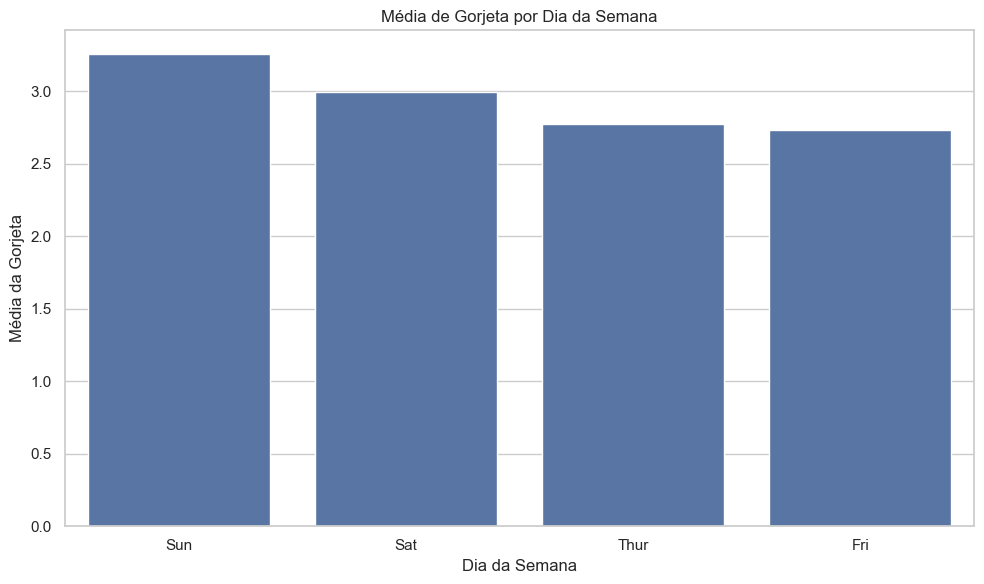

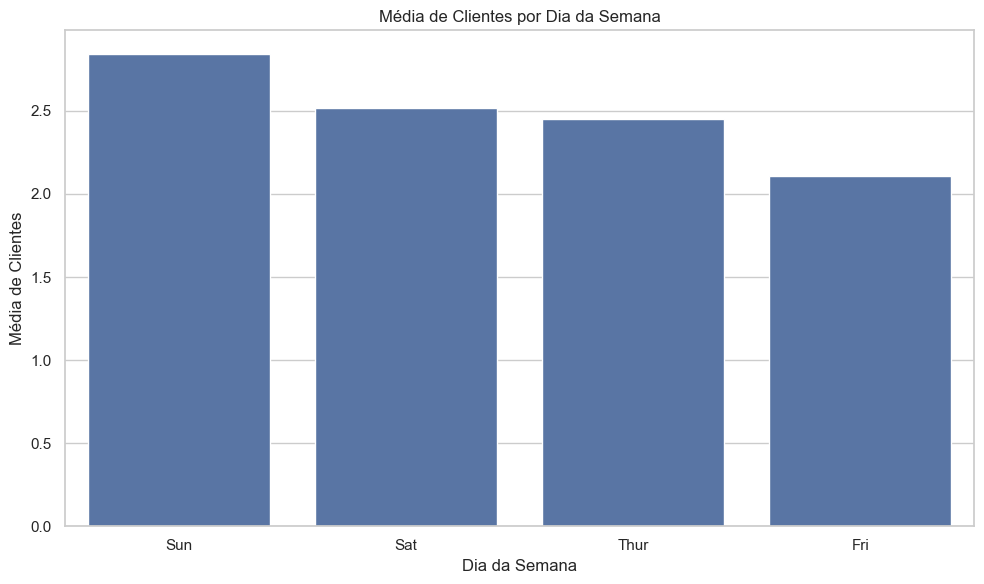

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import io

# Configurando um tema visual para os gráficos
sns.set_theme(style="whitegrid")

# 1. Gráfico de Barras - Média de Gorjetas por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(data=dados_tip, x='day', y='tip', estimator='mean', errorbar=None)
plt.title('Média de Gorjeta por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média da Gorjeta')
plt.tight_layout()

# 2. Gráfico de Barras - Média de Clientes por Dia da Semana
plt.figure(figsize=(10, 6))
sns.barplot(data=dados_tip, x='day', y='size', estimator='mean', errorbar=None)
plt.title('Média de Clientes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Clientes')
plt.tight_layout()





__________________________________________________________________________
Resultado e Análise dos Gráficos acima:

Observa-se que a média da gorjeta é mais alta no domingo (Sun), seguida pelo sábado (Sat).     
Ou seja, clientes tendem a dar gorjetas maiores nos finais de semana, que também é quando se apresenta a maiores médias de comparecimento de clientes, conforme o segundo gráfico.          

No entanto, observa-se que a quinta-feira apresenta melhore resultados em termos de gorjeta, quanto de comparecimento, do que a sexta.      
Talvez por ser considerado um dia de intervalo entre os dias úteis utilizado para lazer.        
__________________________________________________________________________

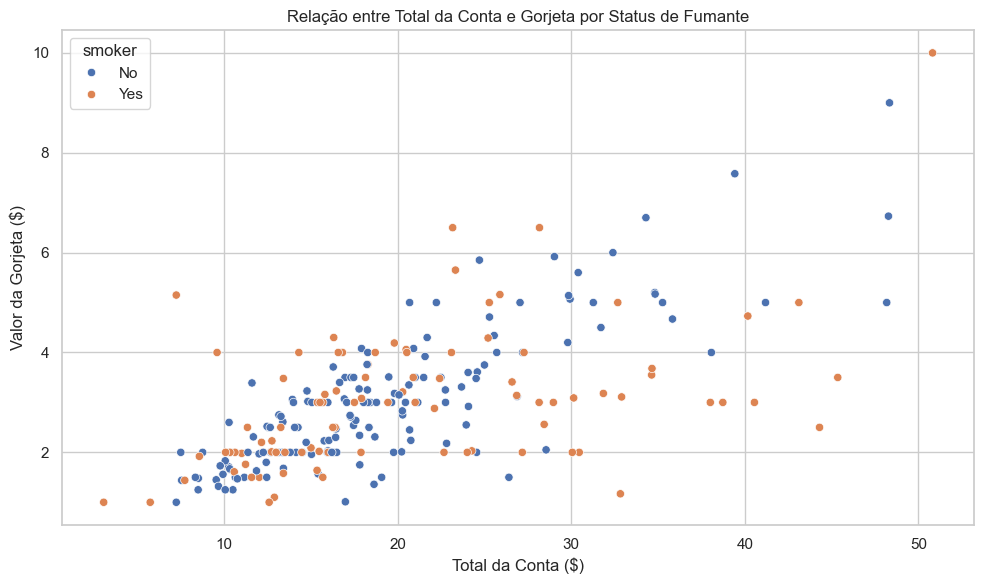

In [24]:
# 3. Gráfico de Dispersão (Relação entre Total da Conta e Gorjeta por Status de Fumante):

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_tip, x='total_bill', y='tip', hue='smoker')
plt.title('Relação entre Total da Conta e Gorjeta por Status de Fumante')
plt.xlabel('Total da Conta ($)')
plt.ylabel('Valor da Gorjeta ($)')
plt.tight_layout()



__________________________________________________________________________
Resultado e Análise do Gráfico acima:          
O status de fumante (smoker) não parece influenciar drasticamente o valor da gorjeta em relação ao total da contas até $ 30.        
No entanto, em contas acima de $30, parece haver predomínio de gorjetas mais altas por não-fumantes.
__________________________________________________________________________     

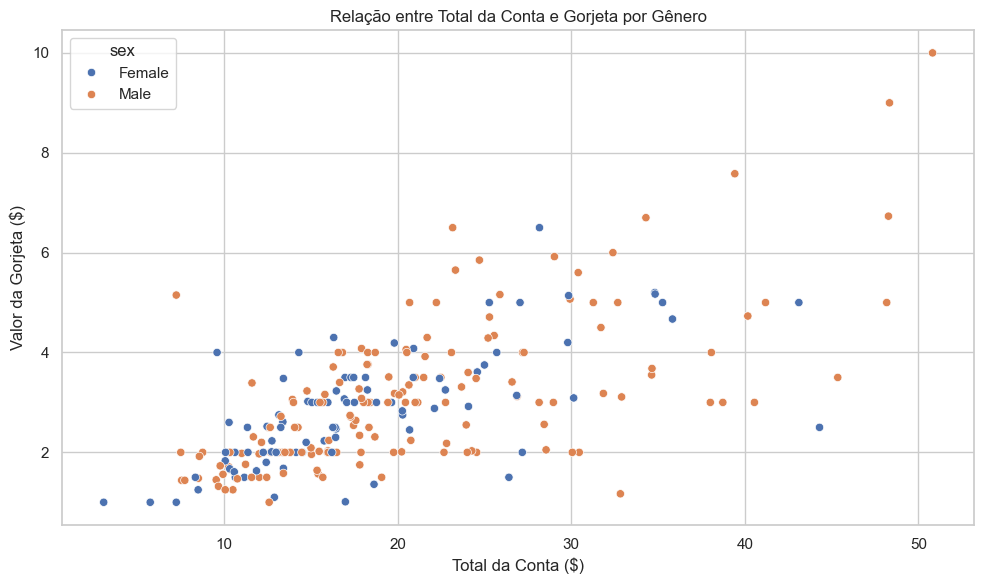

In [25]:
# 4. Gráfico de Dispersão (Relação entre Total da Conta e Gorjeta por Gênero - Masculino ou Feminino):

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_tip, x='total_bill', y='tip', hue='sex')
plt.title('Relação entre Total da Conta e Gorjeta por Gênero')
plt.xlabel('Total da Conta ($)')
plt.ylabel('Valor da Gorjeta ($)')
plt.tight_layout()

__________________________________________________________________________
Resultado e Análise do Gráfico acima:          
É possível notar que homens (Male) e mulheres (Female) parecem seguir um padrão de gorjeta semelhante em contas até $ 30.        
No entanto, em contas acima de $30, parece haver predomínio de gorjetas mais altas por homens.
__________________________________________________________________________  

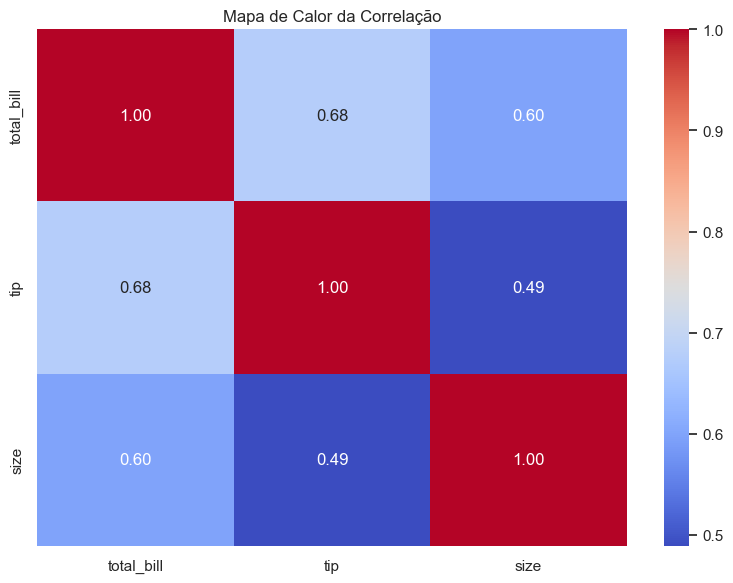

In [26]:
# 5. Mapa de Calor (Heatmap)
plt.figure(figsize=(8, 6))
correlation_matrix = dados_tip[['total_bill', 'tip', 'size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação')
plt.tight_layout()

__________________________________________________________________________
Resultado e Análise do Gráfico acima:               
O mapa de calor quantifica as correlações.       
A correlação entre total_bill e tip é alta, com um valor de 0.68. Da mesma forma, a correlação entre total_bill e size também é forte (0.60), assim como entre tip e size (0.49). Isso indica que essas três variáveis estão positivamente relacionadas entre si.      

No entanto, pode-se perceber que embora, quanto mais alta a conta, isto não significa que a gorjeta sobe na mesma proporção, uma vez que a correlação foi de apenas 0.68, e não de 1         
Ou seja, a gorjeta não é sempre um percentual linear da do valor total da conta. Os clientes tendem a reduzir o valor absoluto em $ para contas maiores.     
__________________________________________________________________________  

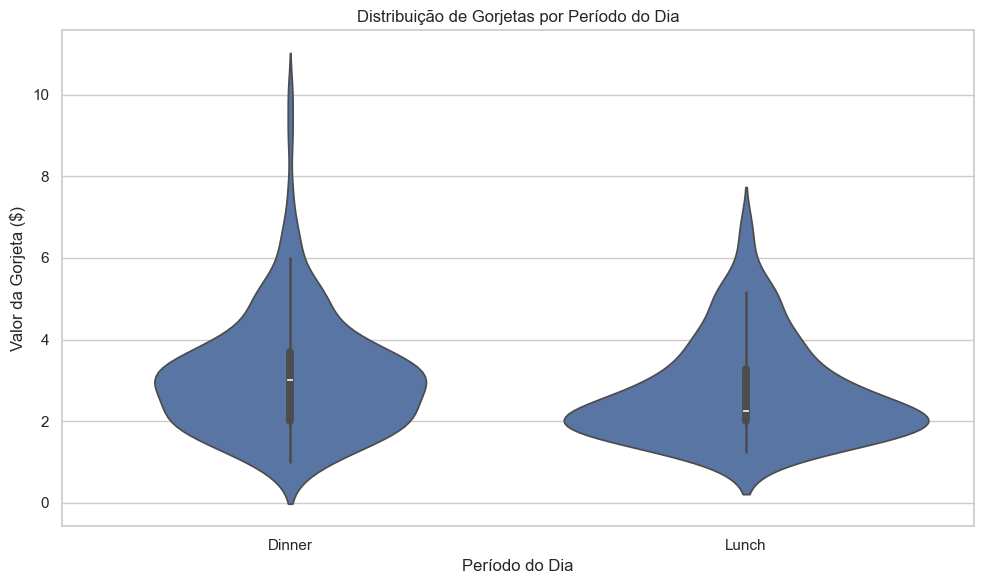

In [27]:
# 6. Gráfico de Violino (Violin Plot) - Gorjetas por período (almoço ou jantar)

plt.figure(figsize=(10, 6))
sns.violinplot(data=dados_tip, x='time', y='tip')
plt.title('Distribuição de Gorjetas por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Valor da Gorjeta ($)')
plt.tight_layout()

__________________________________________________________________________
Resultado e Análise do Gráfico acima:               
Este gráfico de violino mostra a distribuição das gorjetas para o almoço e para o jantar, 
permitindo ver a concentração dos dados, a mediana e a dispersão de forma visual. 

Percebe-se que que no jantar a mediana é mais alta, bem como apresenta valores mais altos de gorjeta.
Enquanto que no almoço percebe-se maior dispersão entre os valores das gojertas (corpo do violino), e estas tendem a ser menores.
__________________________________________________________________________  